# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-04 20:00:03.214936


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/3/20


,12/3/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,14139577,276325,1.95
Brazil,6487084,175270,2.70
India,9571559,139188,1.45
Mexico,1144643,108173,9.45
United Kingdom,1678418,60210,3.59
Italy,1664829,58038,3.49
France,2310271,54231,2.35


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/3/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
55472,US,13721858,2020-12-01,270642.0,2597.0,180637.0,161498.857143
55471,US,13541221,2020-11-30,268045.0,1172.0,157851.0,160406.142857
55470,US,13383370,2020-11-29,266873.0,826.0,138669.0,162358.142857
55469,US,13244701,2020-11-28,266047.0,1189.0,155880.0,162949.285714
55468,US,13088821,2020-11-27,264858.0,1402.0,205514.0,166123.142857
55467,US,12883307,2020-11-26,263456.0,1234.0,110654.0,164695.142857
55466,US,12772653,2020-11-25,262222.0,2293.0,181287.0,175749.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/3/20


,12/3/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,674093,34775.0,5.16
Texas,1286369,22573.0,1.75
California,1286550,19553.0,1.52
Florida,1029030,18874.0,1.83
New Jersey,350999,17209.0,4.90
Illinois,759562,13624.0,1.79
Massachusetts,240907,10874.0,4.51


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/3/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1899,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1898,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143
1897,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286
1896,California,1200624,2020-11-28,19116.0,27.0,15048.0,13598.428571
1895,California,1185576,2020-11-27,19089.0,64.0,13774.0,13689.428571
1894,California,1171802,2020-11-26,19025.0,57.0,10862.0,13518.285714
1893,California,1160940,2020-11-25,18968.0,106.0,15731.0,13842.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/3/20


,12/3/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,421881,7782.0,1.84
Orange,81653,1586.0,1.94
Riverside,90089,1457.0,1.62
San Bernardino,99104,1154.0,1.16
San Diego,86142,1040.0,1.21
Sacramento,39367,591.0,1.50
Alameda,30980,522.0,1.68


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/3/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6020,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6019,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6018,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6017,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6016,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
6015,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143
6014,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143
6013,Los Angeles,374134,2020-11-24,7497.0,51.0,3498.0,4230.142857
6012,Los Angeles,370636,2020-11-23,7446.0,8.0,6116.0,4041.857143
6011,Los Angeles,364520,2020-11-22,7438.0,41.0,2651.0,3565.714286



7 day new US cases as of 12/3/20


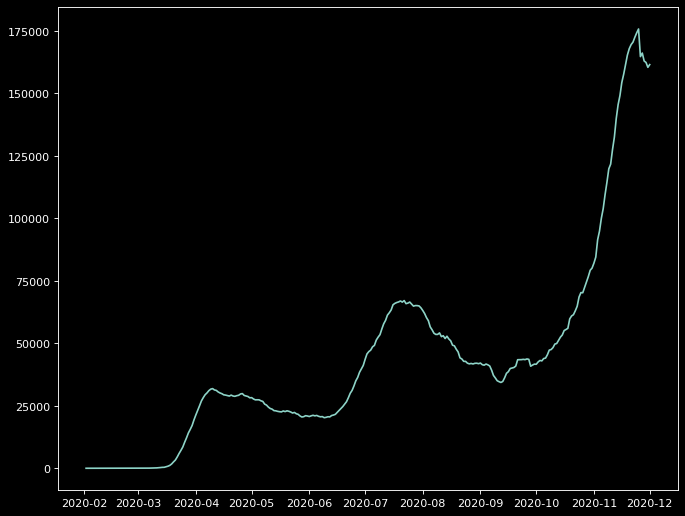

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/3/20


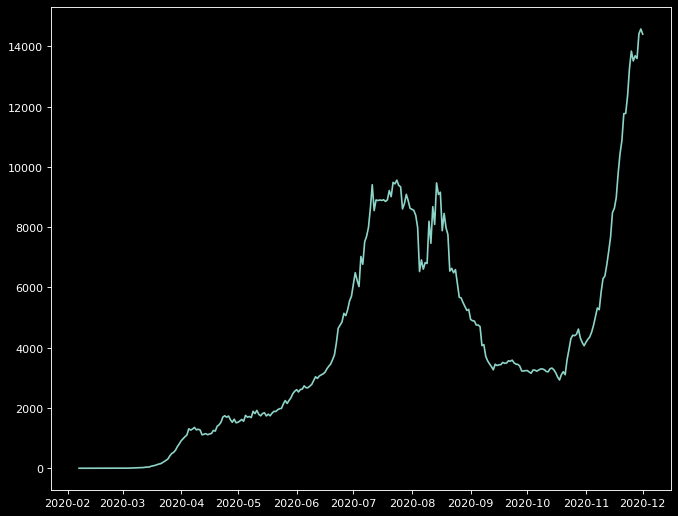

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/3/20


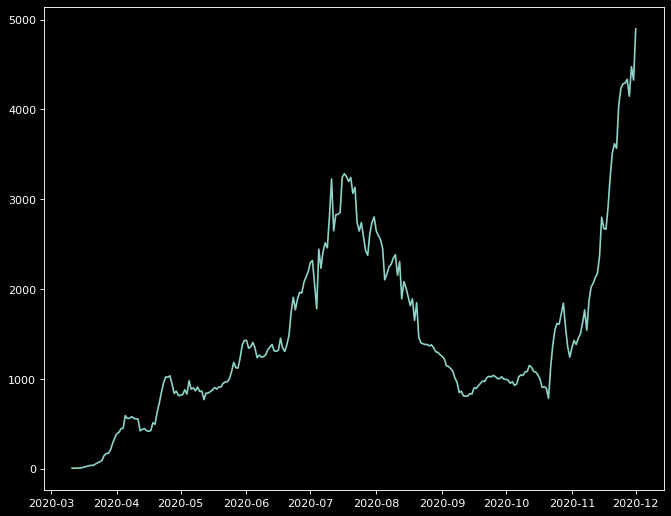

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()